In [ ]:
!pip install tensorflow
!pip install ucimlrepo
!pip install scikit-learn
import os
import warnings

from time import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Import the libs for test split,KNN, svm and DecisionTree Classifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

# Import the libs for Tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow import feature_column
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import utils 
from yellowbrick.model_selection import LearningCurve


from ucimlrepo import fetch_ucirepo
matplotlib.use('agg')
%matplotlib inline

warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
dry_bean = fetch_ucirepo(id=602)
# data (as pandas dataframes) 
X = dry_bean.data.features 
y = dry_bean.data.targets 
# metadata 
print(dry_bean.metadata) 

# variable information 
print(dry_bean.variables)

In [ ]:
df = pd.concat([X, y], axis=1)
df.head()

In [ ]:
import seaborn as sns
print(df['Class'].value_counts())
sns.countplot(x='Class', data=df)

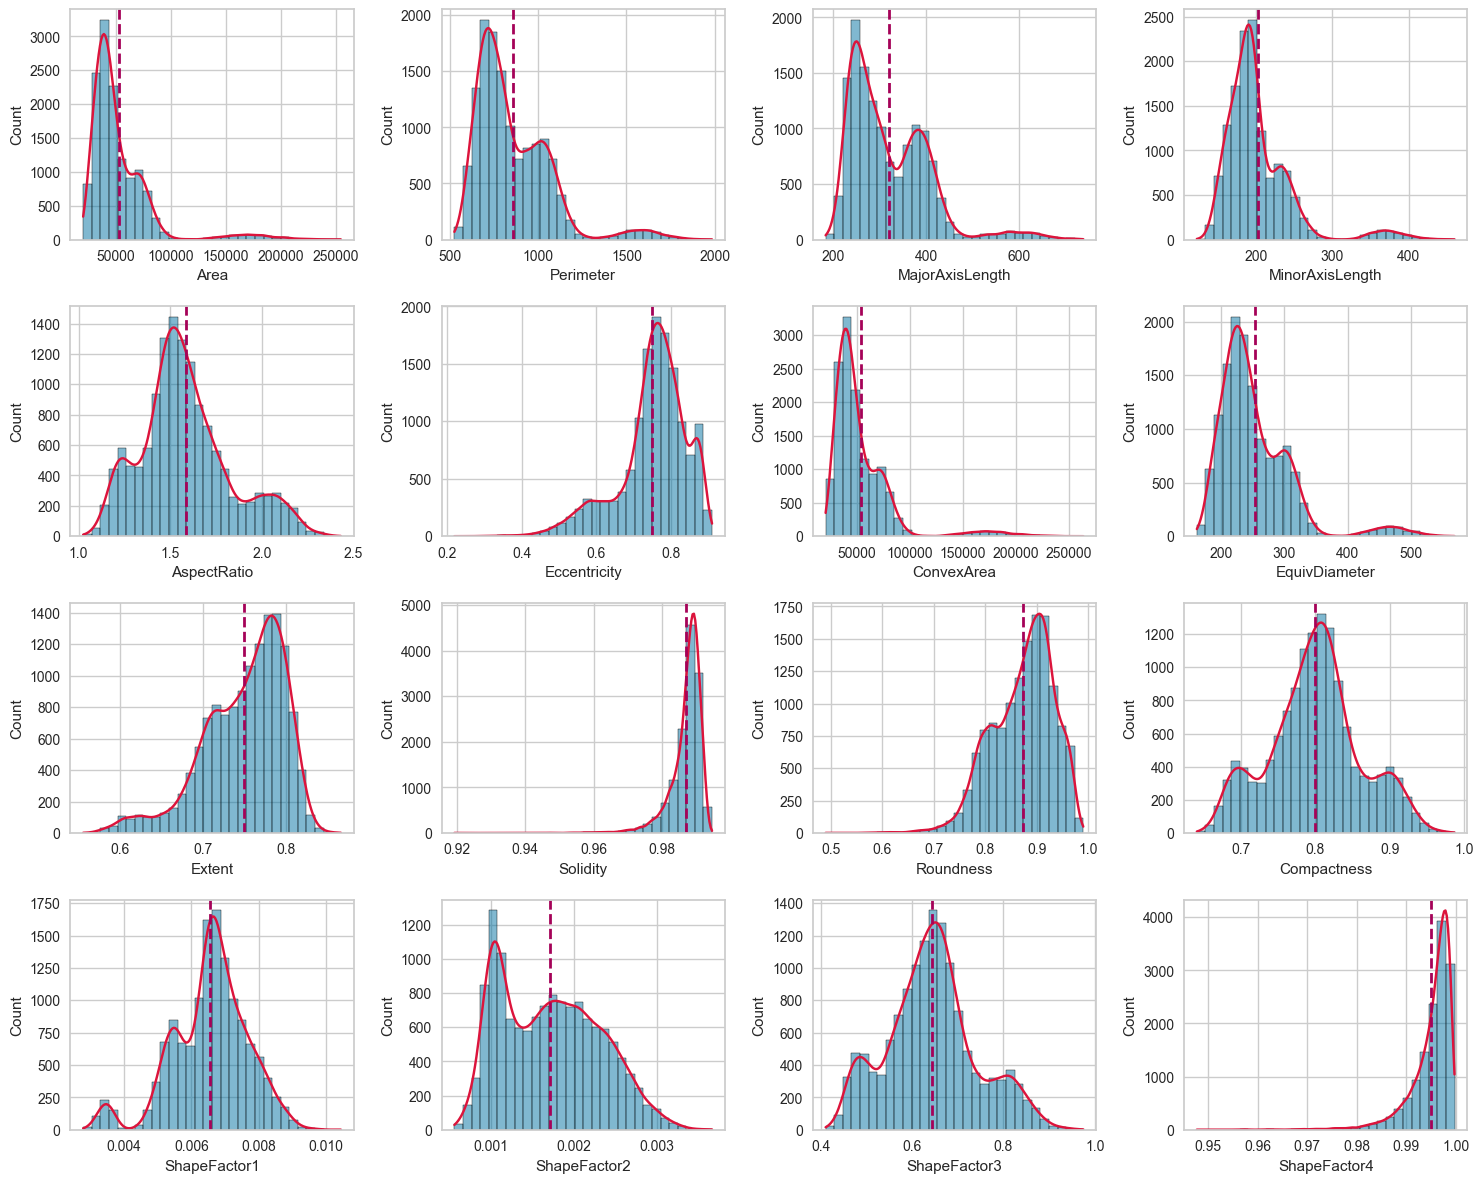

In [20]:
# Basic 
feature_columns = df.columns.to_numpy()[:-1]
col = ['blue','green','crimson','black', 'orange','red', 'white']
fig, ax = plt.subplots(4, 4, figsize=(15, 12))
for variable, subplot in zip(feature_columns, ax.flatten()):
    g=sns.histplot(df[variable],bins=30, kde=True, ax=subplot)
    g.lines[0].set_color('crimson')
    g.axvline(x=df[variable].mean(), color='m', label='Mean', linestyle='--', linewidth=2)
plt.tight_layout()

# Some distributions have long tails and most are bi-modal which means that some bean classes should be quite distinct from others.

In [63]:
## Some distributions have long tails and most are bi-modal which means that some bean classes should be quite distinct from others.

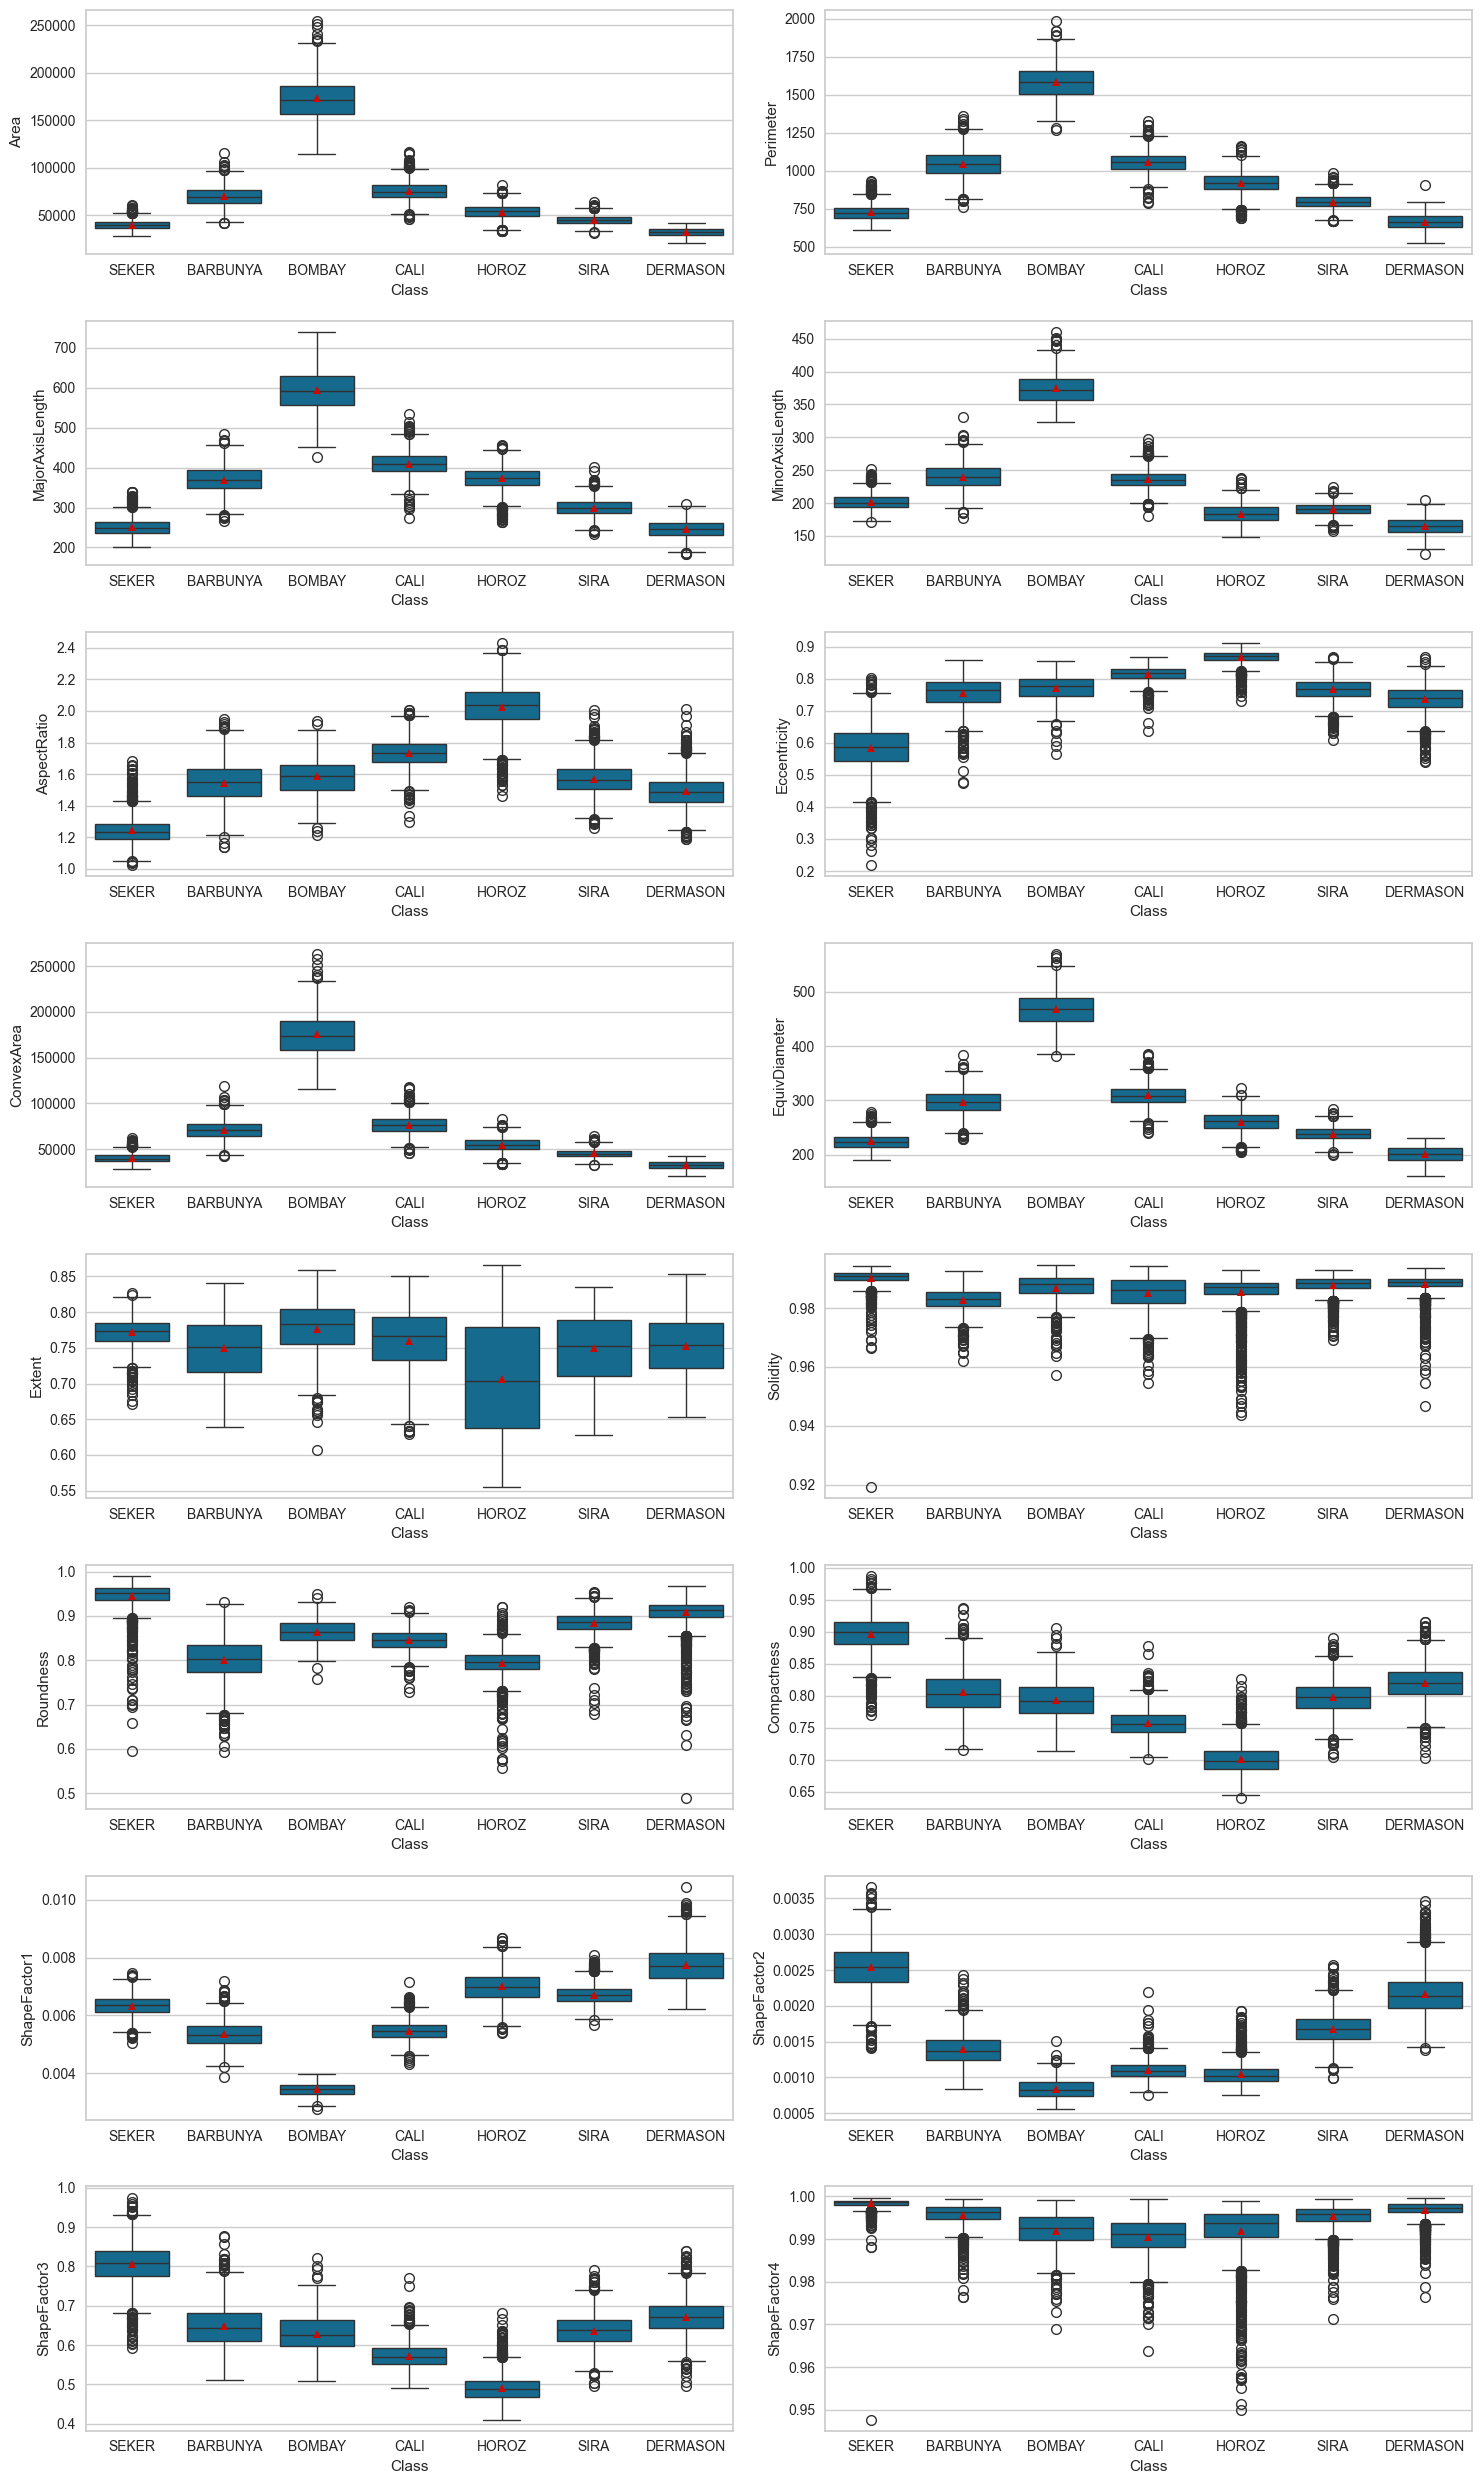

In [21]:
fig, ax = plt.subplots(8, 2, figsize=(15, 25))
for variable, subplot in zip(feature_columns, ax.flatten()):
    sns.boxplot(x=df['Class'], y= df[variable], ax=subplot, showmeans=True)
plt.tight_layout()
# Good plot to show

<Axes: >

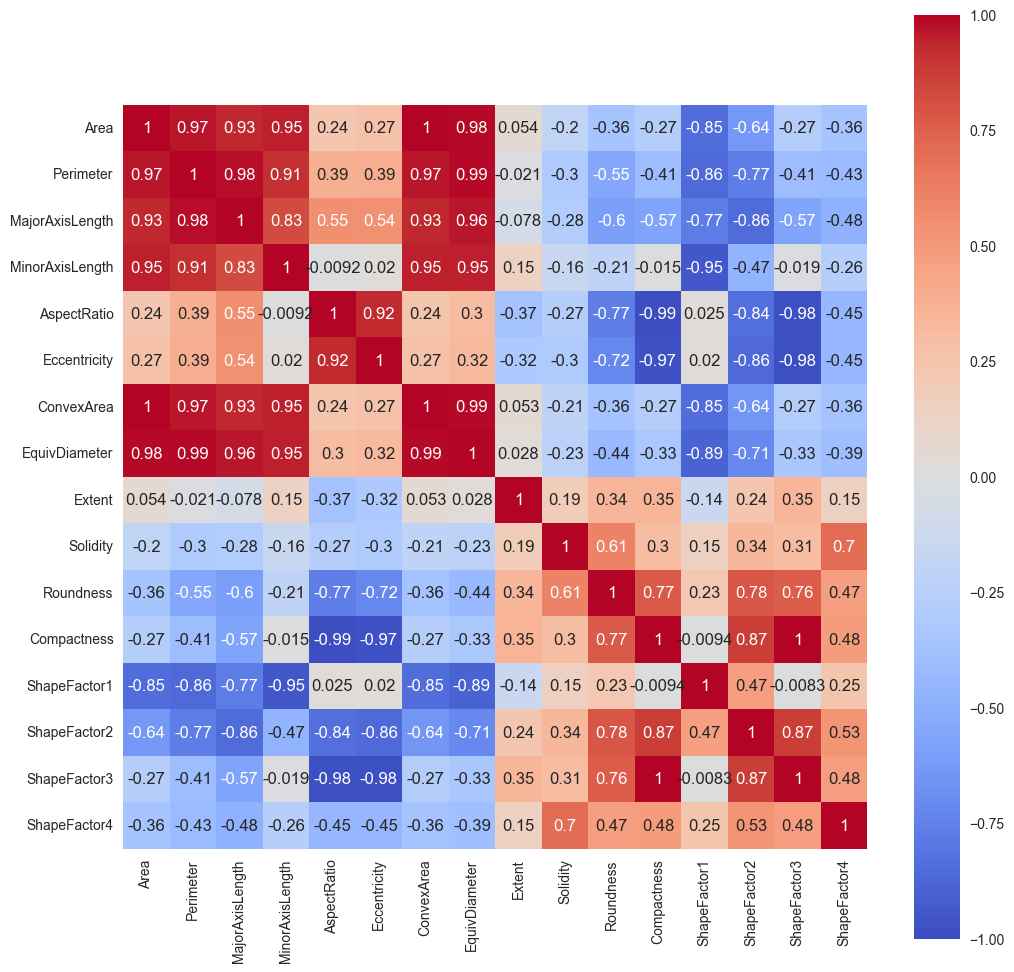

In [22]:
df_filtered = df[feature_columns]
pearson_correlation_matrix = df_filtered.corr("pearson")
plt.figure(figsize=(12,12))
sns.heatmap(pearson_correlation_matrix,vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)


In [24]:
X = df[feature_columns]
y = df['Class']

In [25]:
# Label Encode for y
lbl = LabelEncoder()
y = lbl.fit_transform(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=142)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)

In [352]:
#X_train.reset_index(drop=True, inplace=True)

In [27]:
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
859,38426,709.220,244.388680,200.506918,1.218854,0.571729,38709,221.191100,0.753052,0.992689,0.960004,0.905079,0.006360,0.002633,0.819168,0.998447
3539,164571,1551.378,588.470003,360.203286,1.633716,0.790779,166960,457.753542,0.774477,0.985691,0.859267,0.777871,0.003576,0.000808,0.605083,0.988534
1596,43520,760.012,271.067004,204.751464,1.323883,0.655317,43900,235.396230,0.792541,0.991344,0.946799,0.868406,0.006229,0.002185,0.754129,0.998379
8016,41229,773.459,296.355246,177.613147,1.668543,0.800506,41706,229.116549,0.716378,0.988563,0.866040,0.773115,0.007188,0.001584,0.597706,0.997299
2766,71042,1038.418,375.672860,241.155197,1.557805,0.766764,71867,300.754857,0.719573,0.988520,0.827905,0.800576,0.005288,0.001340,0.640923,0.998433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,168744,1573.509,602.362492,357.827818,1.683386,0.804435,170252,463.520802,0.735133,0.991143,0.856446,0.769505,0.003570,0.000772,0.592138,0.996796
11055,29010,631.818,238.477866,155.437902,1.534232,0.758398,29332,192.189176,0.779650,0.989022,0.913216,0.805899,0.008221,0.002139,0.649474,0.996444
8793,44811,798.298,300.052062,190.675209,1.573629,0.772122,45223,238.862172,0.683772,0.990890,0.883618,0.796069,0.006696,0.001659,0.633726,0.997250
1247,40660,734.722,241.620480,214.896243,1.124359,0.457138,41027,227.530042,0.784715,0.991055,0.946523,0.941684,0.005942,0.002882,0.886768,0.997045


In [28]:
fractions = np.arange(.2,.8,.05)
n_samples = len(X_train)
subsets = []

for frac in fractions:
    size = int(frac * n_samples)
    indices = np.random.choice(len(X_train), size, replace=False)    
    X_subset = X_train.iloc[indices]
    '''
    print(indices)
    print(X_train.index)
    print(len(X_train))
    '''
    y_subset = y_train[indices]
    
    subsets.append((X_subset, y_subset))

In [29]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index)

X_train_partial = []
y_train_partial = []
for subset in subsets:
    X_train_partial_samples, y_train_partial_samples = subset
    X_train_partial_samples_scaled = sc.fit_transform(X_train_partial_samples)
    X_train_partial.append(pd.DataFrame(X_train_partial_samples_scaled))


In [30]:
from sklearn.metrics import accuracy_score
def train_knnclassifier(algo, X_train, y_train, upper_limit=100, step=2):
    upper_limit = upper_limit
    step = step
    k_range = [i for i in range(2, upper_limit, step)]
    print(f'k_range = {k_range}')
    result = []
    max_k, max_acc = float('-inf'),float('-inf')
    for i in k_range:
        model=KNeighborsClassifier(n_neighbors=i, metric=algo)
        model.fit(X_train,y_train)
        prediction=model.predict(X_val)
        acc = accuracy_score(prediction,y_val)
        #result.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
        print(f"k = {i} and result = {acc}")
        if acc > max_acc:
            max_acc = acc
            max_k = i
        
        result.append(acc)
    
    #print(f"max_k = {max_k} ; max_acc = {max_acc}")
    return result, max_k

In [34]:
algorithms = ['minkowski', 'cosine']
results = []
val1, k1 = train_knnclassifier(algorithms[0], X_train, y_train)
val2, k2 = train_knnclassifier(algorithms[1], X_train, y_train)
k_range = [i for i in range(2, 10, 2)]

print(f'k_range = {k_range}; val1 = {val1}')
print(f'k_range = {k_range}; val2 = {val2}')
plt.plot(k_range, val1, color='blue',label='minkowski')
plt.plot(k_range, val2, color='green',label='cosine')
plt.legend(loc='upper right')
plt.xticks(k_range)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

k_range = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]
k = 2 and result = 0.037122969837587005
k = 4 and result = 0.037122969837587005
k = 6 and result = 0.037122969837587005
k = 8 and result = 0.037122969837587005
k = 10 and result = 0.037122969837587005
k = 12 and result = 0.037122969837587005
k = 14 and result = 0.037122969837587005
k = 16 and result = 0.037122969837587005
k = 18 and result = 0.037122969837587005
k = 20 and result = 0.037122969837587005
k = 22 and result = 0.037122969837587005
k = 24 and result = 0.037122969837587005
k = 26 and result = 0.037122969837587005
k = 28 and result = 0.037122969837587005
k = 30 and result = 0.037122969837587005
k = 32 and result = 0.037122969837587005
k = 34 and result = 0.037122969837587005
k = 36 and result = 0.037122969837587005
k = 38 and result = 0.037122969837587005
k = 40 and result = 0.

KeyboardInterrupt: 

In [372]:
def get_accuracy(x_train, y_train, k=11):
    model=KNeighborsClassifier(k)
    model.fit(x_train,y_train)
    prediction=model.predict(X_val)
    acc = accuracy_score(prediction,y_val)
    return acc

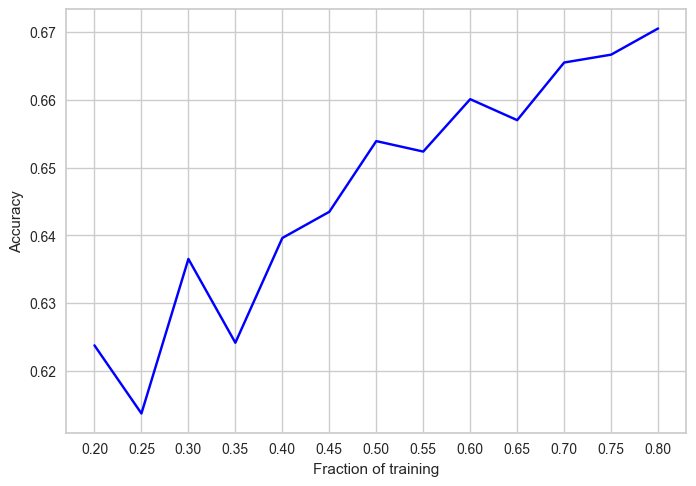

In [396]:
acc_partial = []
for subset in subsets:
    X_train, y_train = subset
    acc_partial.append(get_accuracy(X_train, y_train))
plt.plot(fractions, acc_partial, color='blue')
plt.xticks(fractions)
plt.xlabel("Fraction of training")
plt.ylabel("Accuracy")
plt.show()


In [158]:
print(len(X_train_20_sampled), len(y_train_20_sampled))
print(len(X_train_40_sampled), len(y_train_40_sampled))
print(len(X_train_60_sampled), len(y_train_60_sampled))
print(len(X_train_80_sampled), len(y_train_80_sampled))

2068 2068
4137 4137
6206 6206
8275 8275


In [175]:
for i in range(len(y_train_sample)):
    print(get_accuracy(x_ss[i], y_train_sample[i]))

0.5324825986078886
0.545630317092034
0.5274555297757154
0.5471771075019335
0.5421500386697602
0.54292343387471
0.5433101314771849
0.5479505027068832


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train and y_train are your features and labels for the training data

# Define the parameter grid for k values
param_grid = {'n_neighbors': range(1, 21)}  # Search for k from 1 to 20

for i in range(1, 100, 2):
    # Create a k-Nearest Neighbors classifier
    knn = KNeighborsClassifier()

    # Perform grid search to find the best k value
    grid_search.fit(X_train, y_train)

# Print the best k value and its corresponding accuracy score
print("Best k:", grid_search.best_params_['n_neighbors'])
print("Best accuracy:", grid_search.best_score_)

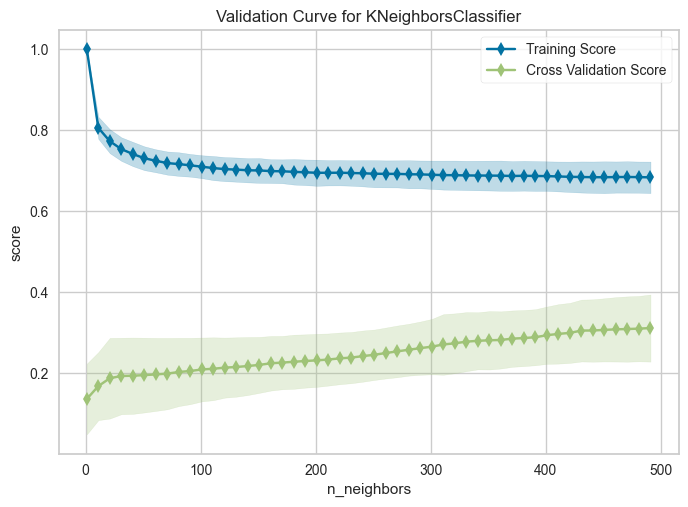

<Axes: title={'center': 'Validation Curve for KNeighborsClassifier'}, xlabel='n_neighbors', ylabel='score'>

In [68]:
from yellowbrick.model_selection import ValidationCurve
#cv = StratifiedKFold(4)
param_range = range(1,500,10)
oz = ValidationCurve(
    KNeighborsClassifier(), param_name="n_neighbors",
    #param_range=param_range, cv=cv, scoring="accuracy", n_jobs=4,
    param_range=param_range, scoring="accuracy",
)
oz.fit(X, y)
oz.show()

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Assuming X_train and y_train are your features and labels for the training data

# Define the parameter grid for k values
param_grid = {'n_neighbors': range(1, 21)}  # Search for k from 1 to 20

# Create a k-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best k value
grid_search.fit(X_train, y_train)

# Print the best k value and its corresponding accuracy score
print("Best k:", grid_search.best_params_['n_neighbors'])
print("Best accuracy:", grid_search.best_score_)

Best k: 16
Best accuracy: 0.9262367564666958


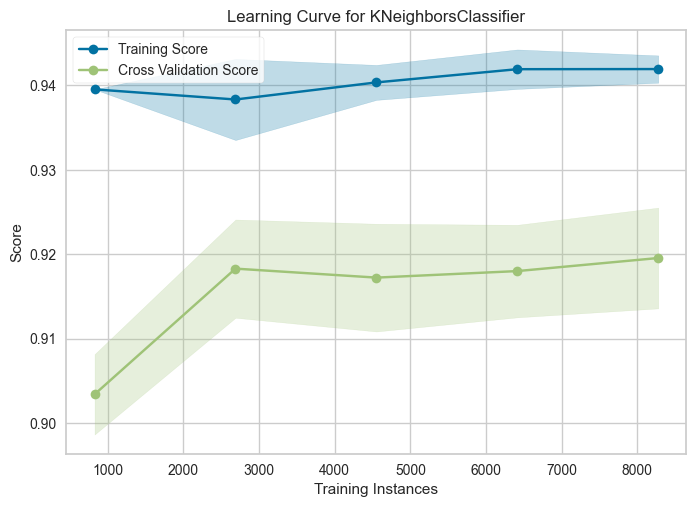

<Axes: title={'center': 'Learning Curve for KNeighborsClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [62]:
# Create a k-Nearest Neighbors classifier
model = KNeighborsClassifier(n_neighbors=5)

# Create a LearningCurve visualizer
visualizer = LearningCurve(model, scoring='accuracy')

# Fit and visualize the learning curve
visualizer.fit(X_train, y_train)
visualizer.show()

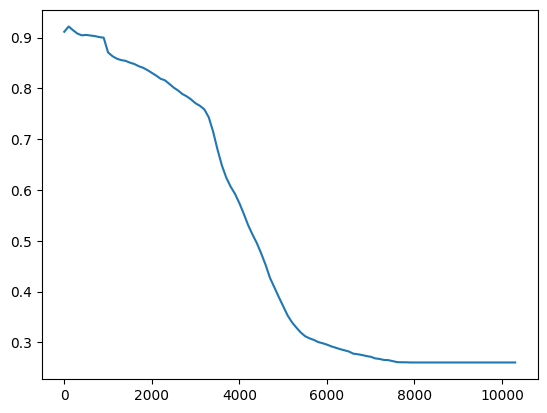

In [201]:
param_range = range(1,10302, 100)

plt.plot(param_range,result)
#plt.xticks(param_range)

In [218]:
print(len(X_val))
print(len(y_val))
from collections import Counter
Counter(y_train)
#Counter(y_val)
prediction


2586
2586


array([3, 3, 3, ..., 3, 3, 3])

In [243]:
y_train_1 = to_categorical(y_train)
y_val_1 = to_categorical(y_val)


In [245]:
utils.set_random_seed(812)
epoch = 500
#CHange the layers or neurons
model = Sequential([
    Dense(units=4, activation='relu', input_shape = (X_train.shape[1],)),
    Dense(units=5, activation='relu'),
    Dense(units=7, activation='softmax')
    ])
#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
#history = model.fit(X_train, y_train, epochs=epoch, validation_data=(X_val, y_val), batch_size=32)
history = model.fit(X_train, y_train_1, epochs=epoch, validation_data=(X_val, y_val_1))



Epoch 1/500
324/324 [==============================] - 2s 3ms/step - loss: 1.5231 - accuracy: 0.3860 - val_loss: 1.0518 - val_accuracy: 0.5317
Epoch 2/500
324/324 [==============================] - 1s 2ms/step - loss: 0.9211 - accuracy: 0.5970 - val_loss: 0.8266 - val_accuracy: 0.6651
Epoch 3/500
324/324 [==============================] - 1s 2ms/step - loss: 0.7489 - accuracy: 0.7278 - val_loss: 0.6545 - val_accuracy: 0.8043
Epoch 4/500
324/324 [==============================] - 1s 2ms/step - loss: 0.5482 - accuracy: 0.8475 - val_loss: 0.4626 - val_accuracy: 0.8623
Epoch 5/500
324/324 [==============================] - 1s 2ms/step - loss: 0.4174 - accuracy: 0.8683 - val_loss: 0.3785 - val_accuracy: 0.8770
Epoch 6/500
324/324 [==============================] - 1s 2ms/step - loss: 0.3643 - accuracy: 0.8777 - val_loss: 0.3446 - val_accuracy: 0.8840
Epoch 7/500
324/324 [==============================] - 1s 2ms/step - loss: 0.3384 - accuracy: 0.8855 - val_loss: 0.3291 - val_accuracy: 0.8921

Epoch 58/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2091 - accuracy: 0.9235 - val_loss: 0.2137 - val_accuracy: 0.9246
Epoch 59/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2088 - accuracy: 0.9242 - val_loss: 0.2174 - val_accuracy: 0.9234
Epoch 60/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2086 - accuracy: 0.9253 - val_loss: 0.2122 - val_accuracy: 0.9227
Epoch 61/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2081 - accuracy: 0.9256 - val_loss: 0.2110 - val_accuracy: 0.9250
Epoch 62/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2076 - accuracy: 0.9261 - val_loss: 0.2128 - val_accuracy: 0.9242
Epoch 63/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2074 - accuracy: 0.9253 - val_loss: 0.2116 - val_accuracy: 0.9246
Epoch 64/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2065 - accuracy: 0.9252 - val_loss: 0.2107 - val_accuracy:

Epoch 115/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2014 - accuracy: 0.9270 - val_loss: 0.2073 - val_accuracy: 0.9273
Epoch 116/500
324/324 [==============================] - 1s 3ms/step - loss: 0.2014 - accuracy: 0.9269 - val_loss: 0.2067 - val_accuracy: 0.9261
Epoch 117/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2008 - accuracy: 0.9269 - val_loss: 0.2085 - val_accuracy: 0.9238
Epoch 118/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2006 - accuracy: 0.9270 - val_loss: 0.2103 - val_accuracy: 0.9281
Epoch 119/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2007 - accuracy: 0.9272 - val_loss: 0.2073 - val_accuracy: 0.9273
Epoch 120/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2004 - accuracy: 0.9279 - val_loss: 0.2074 - val_accuracy: 0.9265
Epoch 121/500
324/324 [==============================] - 1s 2ms/step - loss: 0.2011 - accuracy: 0.9269 - val_loss: 0.2072 - val_ac

324/324 [==============================] - 1s 2ms/step - loss: 0.1980 - accuracy: 0.9270 - val_loss: 0.2122 - val_accuracy: 0.9277
Epoch 228/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1977 - accuracy: 0.9279 - val_loss: 0.2138 - val_accuracy: 0.9242
Epoch 229/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1984 - accuracy: 0.9282 - val_loss: 0.2067 - val_accuracy: 0.9273
Epoch 230/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1984 - accuracy: 0.9289 - val_loss: 0.2113 - val_accuracy: 0.9242
Epoch 231/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1991 - accuracy: 0.9291 - val_loss: 0.2071 - val_accuracy: 0.9258
Epoch 232/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1982 - accuracy: 0.9281 - val_loss: 0.2079 - val_accuracy: 0.9254
Epoch 233/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1982 - accuracy: 0.9285 - val_loss: 0.2061 - val_accuracy: 0.9296

324/324 [==============================] - 1s 2ms/step - loss: 0.1971 - accuracy: 0.9289 - val_loss: 0.2085 - val_accuracy: 0.9265
Epoch 340/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1975 - accuracy: 0.9274 - val_loss: 0.2133 - val_accuracy: 0.9258
Epoch 341/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1967 - accuracy: 0.9296 - val_loss: 0.2117 - val_accuracy: 0.9265
Epoch 342/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1966 - accuracy: 0.9292 - val_loss: 0.2073 - val_accuracy: 0.9250
Epoch 343/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1970 - accuracy: 0.9279 - val_loss: 0.2073 - val_accuracy: 0.9285
Epoch 344/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1969 - accuracy: 0.9289 - val_loss: 0.2071 - val_accuracy: 0.9277
Epoch 345/500
324/324 [==============================] - 1s 2ms/step - loss: 0.1963 - accuracy: 0.9288 - val_loss: 0.2085 - val_accuracy: 0.9281

324/324 [==============================] - 1s 3ms/step - loss: 0.1958 - accuracy: 0.9277 - val_loss: 0.2085 - val_accuracy: 0.9277
Epoch 452/500
324/324 [==============================] - 1s 3ms/step - loss: 0.1953 - accuracy: 0.9285 - val_loss: 0.2078 - val_accuracy: 0.9258
Epoch 453/500
324/324 [==============================] - 1s 3ms/step - loss: 0.1959 - accuracy: 0.9283 - val_loss: 0.2080 - val_accuracy: 0.9288
Epoch 454/500
324/324 [==============================] - 1s 3ms/step - loss: 0.1952 - accuracy: 0.9293 - val_loss: 0.2099 - val_accuracy: 0.9254
Epoch 455/500
324/324 [==============================] - 1s 3ms/step - loss: 0.1958 - accuracy: 0.9282 - val_loss: 0.2063 - val_accuracy: 0.9281
Epoch 456/500
324/324 [==============================] - 1s 3ms/step - loss: 0.1959 - accuracy: 0.9288 - val_loss: 0.2063 - val_accuracy: 0.9292
Epoch 457/500
324/324 [==============================] - 1s 3ms/step - loss: 0.1960 - accuracy: 0.9270 - val_loss: 0.2092 - val_accuracy: 0.9281

In [19]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a KNN classifier instance
knn = KNeighborsClassifier()

# Use GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)


Best parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Best score: 0.7319061918301907
